In [1]:
import cv2 as cv 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import math
import numpy as np

### If you want to receive the photos one by one

In [2]:
imagefiles = glob.glob("Dataset\Result2\*.jpg")
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    data.append(img)

num_images = len(data)
num_images

7412

### You can also use the following code to get data

In [3]:
from numpy import load
# load dict of arrays
dict_data = load('Dataset\Result2\label\dataset.npz')
# extract the first array
data = dict_data['arr_0']

### Receive labels

In [4]:
label_ch = pd.read_csv('Dataset\Result2\label\label.csv')
label_no = pd.read_csv('Dataset\Result2\label\label_index.csv')

In [5]:
label_ch.head()

,label
0,he
1,5
2,5
3,9
4,4


In [6]:
label_no.head()

,label
0,38
1,5
2,5
3,9
4,4


In [7]:
label_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7412 entries, 0 to 7411
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   7412 non-null   int64
dtypes: int64(1)
memory usage: 58.0 KB


## Show some sample data

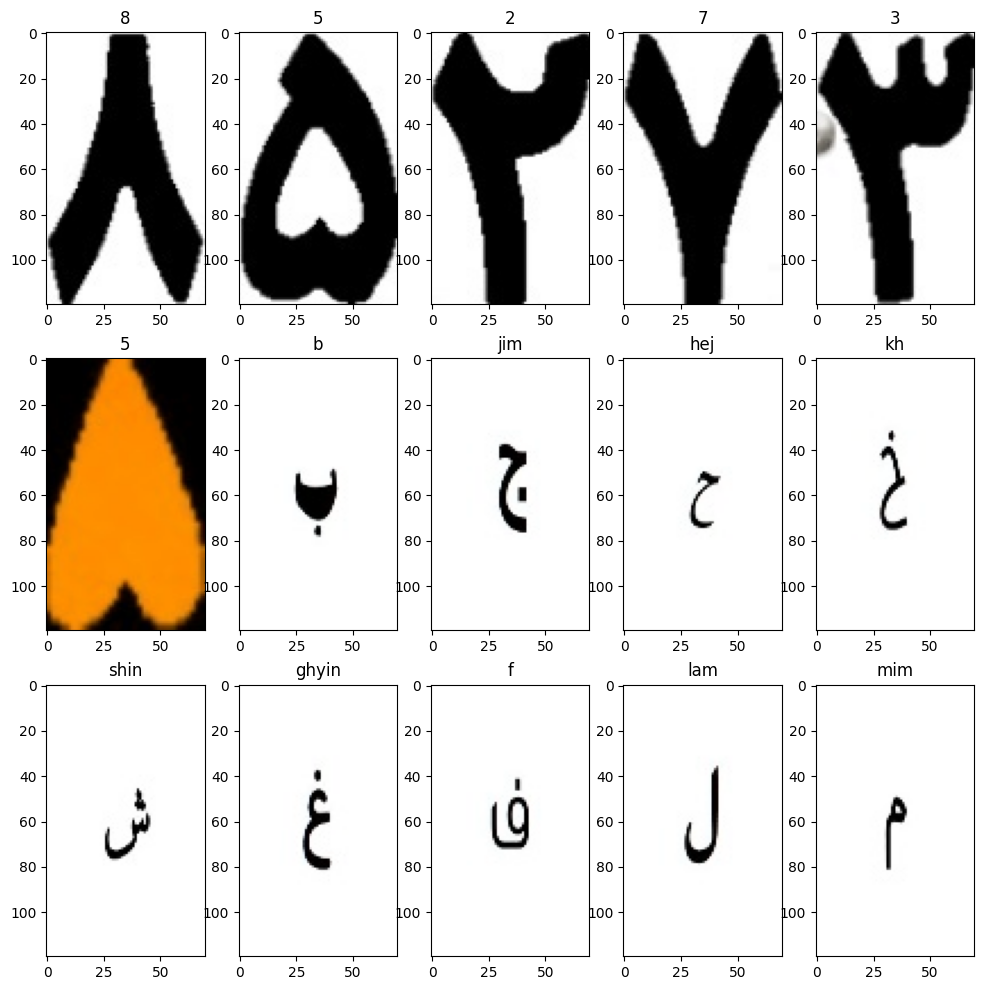

In [8]:
lst = [8,124,358,1200,1658,2478,3568,3900,4125,4265,5000,5321,5469,5846,5999,6400]
counter = 0
fig , ax = plt.subplots(3,5, figsize=(12,12))
for i in range(3):
    for j in range(5):
        ax[i][j].set_title(label_ch.iloc[lst[counter]].values[0])
        ax[i][j].imshow(data[lst[counter]])
        counter += 1

### train_test_split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,label_no, test_size=0.2, random_state=42)

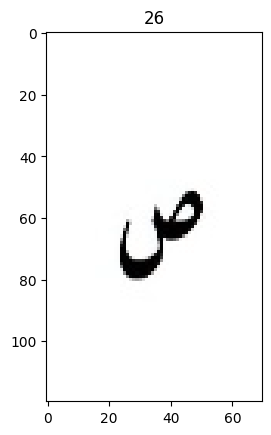

In [10]:
plt.imshow(xtrain[0])
plt.title(np.array(ytrain)[0][0]);

### Model

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [120, 70,3]))
model.add(keras.layers.Dense(350, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(41, activation = 'softmax'))

C:\Users\Shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [13]:
model.fit(xtrain, ytrain, epochs=50)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.2137 - loss: 2993.5010
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.3950 - loss: 2.3058
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.4107 - loss: 2.2782
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.4244 - loss: 2.2387
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4106 - loss: 2.2616
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4106 - loss: 2.2522
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.4113 - loss: 2.2535
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.4150 - loss: 2.2471
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4155 - loss: 2.2367
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.3967 - loss: 2.3060
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.4182 - loss: 2.2371
Epoch 12/50
186/186 ━━━━━━━

In [14]:
model.save('model_beta.h5')